## Import Data

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DIR = os.getcwd()
print(DIR)



df = pd.read_csv(DIR + "/2019to2020contributions.csv",
                    parse_dates = ["contribution_receipt_date"]) 

df.columns

/Users/lukedobrovic/Data/CampaignContributions


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (12,18,20,32,50,51,53,54,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['committee_id', 'committee_name', 'report_year', 'report_type',
       'image_number', 'line_number', 'transaction_id', 'file_number',
       'committee_name.1', 'entity_type', 'entity_type_desc',
       'unused_contbr_id', 'contributor_prefix', 'contributor_name',
       'recipient_committee_type', 'recipient_committee_org_type',
       'recipient_committee_designation', 'contributor_first_name',
       'contributor_middle_name', 'contributor_last_name',
       'contributor_suffix', 'contributor_street_1', 'contributor_street_2',
       'contributor_city', 'contributor_state', 'contributor_zip',
       'contributor_employer', 'contributor_occupation', 'contributor_id',
       'receipt_type', 'receipt_type_desc', 'receipt_type_full', 'memo_code',
       'memo_code_full', 'contribution_receipt_date',
       'contribution_receipt_amount', 'contributor_aggregate_ytd',
       'candidate_id', 'candidate_name', 'candidate_first_name',
       'candidate_last_name', 'candidate_middle_na

## Data Cleaning: Select desired columns, remove other "Columbia" institutions and remove negative values under contributions

In [10]:
# df.columns
df_selections = df[[ "committee_name", "contribution_receipt_date",
                    "contribution_receipt_amount", "contributor_employer", 
                   "contributor_occupation", "contributor_first_name", 
                   "contributor_middle_name", "contributor_last_name"]]

In [11]:
faux = ["MISSOURI", "BRITISH", "DISTRICT", "CHICAGO", "INTERNATIONAL", "MO", "UNIVERSITY HOSPITAL", "FLORIDA"]

df_selections = df_selections[~df_selections.contributor_employer.str.contains('|'.join(faux))]

df_selections = df_selections[df_selections["contribution_receipt_amount"] >= 0]  

## Create dataframes with contributions to each campaign

In [12]:
df_biden = df_selections[df_selections["committee_name"].str.contains("BIDEN FOR PRESIDENT")]

df_biden.reset_index()

df_trump = df_selections[df_selections["committee_name"].str.contains("DONALD J. TRUMP FOR PRESIDENT, INC.")]

df_trump.reset_index()

,index,committee_name,contribution_receipt_date,contribution_receipt_amount,contributor_employer,contributor_occupation,contributor_first_name,contributor_middle_name,contributor_last_name
0,89,"DONALD J. TRUMP FOR PRESIDENT, INC.",2019-03-05,2800.00,COLUMBIA UNIVERSITY,PSYCHOLOGY PROFESSOR,ROBERT,NaN,SIEGLER
1,90,"DONALD J. TRUMP FOR PRESIDENT, INC.",2019-01-10,25.00,NYPH/COLUMBIA UNIVERSITY,RN,GISELA,NaN,MINIER
2,91,"DONALD J. TRUMP FOR PRESIDENT, INC.",2019-01-20,35.00,NYPH/COLUMBIA UNIVERSITY,RN,GISELA,NaN,MINIER
3,92,"DONALD J. TRUMP FOR PRESIDENT, INC.",2019-02-20,35.00,NYPH/COLUMBIA UNIVERSITY,RN,GISELA,NaN,MINIER
4,93,"DONALD J. TRUMP FOR PRESIDENT, INC.",2019-03-20,35.00,NYPH/COLUMBIA UNIVERSITY,RN,GISELA,NaN,MINIER
...,...,...,...,...,...,...,...,...,...
103,46799,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-08-07,0.37,COLUMBIA UNIVERSITY MEDICAL CENTER,LAB SCIENTIST,RAFAEL,NaN,FERRER
104,46801,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-08-09,26.25,COLUMBIA UNIVERSITY,TECHNOLOGIST,ANDREW,NaN,MADEJCZYK
105,47065,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-09-07,23.75,TEACHERS COLLEGE COLUMBIA UNIVERSITY,ACCOUNTANT,KIM,M,SANTORO
106,47066,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-08-30,118.75,COLUMBIA SOUTHERN UNIVERSITY,PROFESSOR,CHRIS,NaN,WIKE


## Group contributions by receipt date for each campaign and visualize!

In [13]:
df_biden = df_biden.groupby(["contribution_receipt_date"], as_index=False).sum()

df_trump = df_trump.groupby(["contribution_receipt_date"], as_index=False).sum()

Text(0.5, 1.0, 'Contributions to Trump Campaign since 1/1/2019')

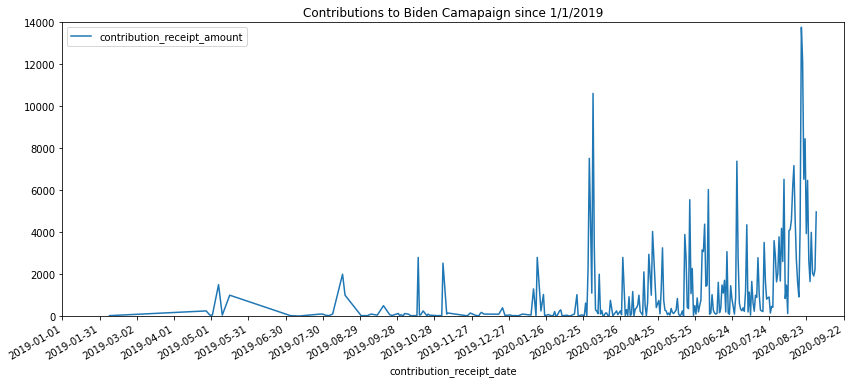

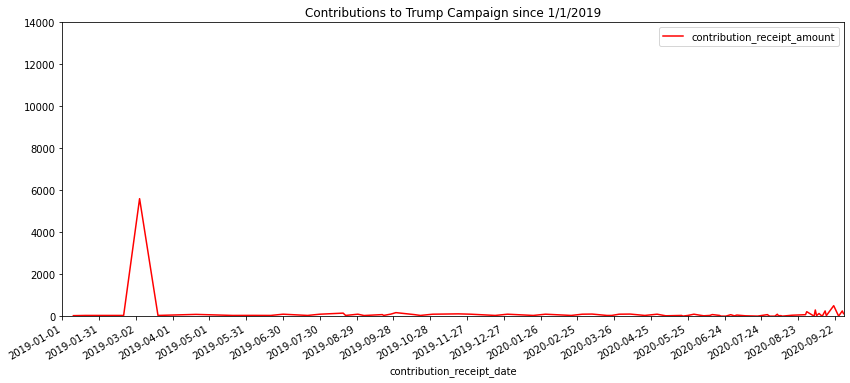

In [105]:
from datetime import datetime, timedelta
t = np.arange(datetime(2019,1,1), datetime(2020,10,1), timedelta(days=30)).astype(datetime)
# y = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000]

ax1 = df_biden.plot(x="contribution_receipt_date", y="contribution_receipt_amount",
             figsize=(14, 6))
ax1.set_xticks(t)
ax1.set_ylim([0, 14000])
ax1.set_title("Contributions to Biden Camapaign since 1/1/2019")


ax2 = df_trump.plot(x="contribution_receipt_date", y="contribution_receipt_amount",
                   figsize=(14,6),
                   color="red")
ax2.set_xticks(t)
ax2.set_ylim([0, 14000])
ax2.set_title("Contributions to Trump Campaign since 1/1/2019")

## Collect and visualize top committes by funds raised over 2019-2020

In [18]:
df_committees = df_selections.groupby(["committee_name"], as_index=False).sum()
df_committees.sort_values(by="contribution_receipt_amount", ascending=False, inplace=True)
df_committees.reset_index(inplace=True)

df_committees.head()

,index,committee_name,contribution_receipt_amount
0,4,ACTBLUE,744258.21
1,31,BIDEN FOR PRESIDENT,321338.12
2,34,BLUE TIDE NY-1 LLC,172000.00
3,28,BERNIE 2020,70965.79
4,86,DNC SERVICES CORP / DEMOCRATIC NATIONAL COMMITTEE,67177.50


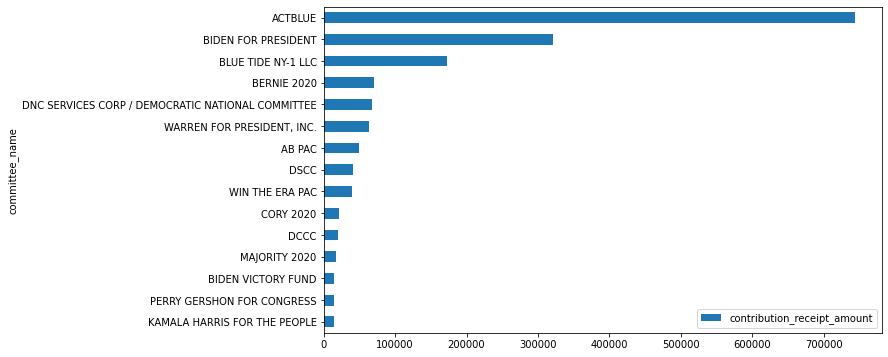

In [19]:
ax3 = df_committees.head(15).plot(kind="barh",
                        x = "committee_name",
                        y = "contribution_receipt_amount",
                                 figsize=(10,6))
ax3.invert_yaxis()

## Collect and visualize occupation of individual Columbia donors 

In [63]:
df_occ = df_selections.drop_duplicates(subset=["contributor_last_name", "contributor_middle_name",
                                              "contributor_middle_name"])
occupations = df_occ["contributor_occupation"].value_counts()

In [93]:
len(occupations)

972

In [96]:
others = 0
for x in range(15, 972, 1):
    others += occupations[x]
    
others

2128

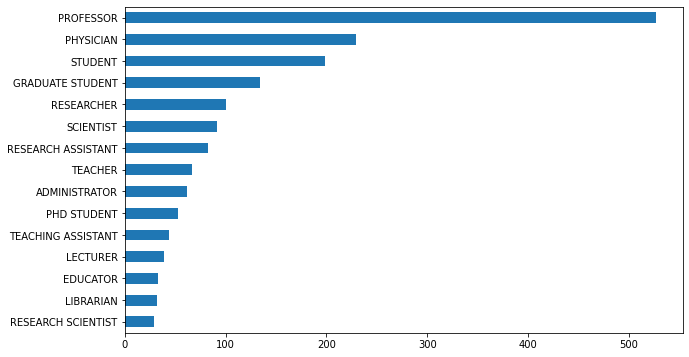

In [97]:
ax4 = occupations.head(15).plot(kind="barh",
                               figsize=(10,6))
ax4.invert_yaxis()

## Bubble plot for individual Columbia donors

In [98]:
from pprint import pprint as pp
import circlify as circ

[Circle(x=0.09222041925800777, y=0.8617116738294696, r=0.09068624109026069, level=1, ex={'datum': 1}),
 Circle(x=-0.40283175658099674, y=0.7512387781681531, r=0.12824971207048294, level=1, ex={'datum': 2}),
 Circle(x=0.3252787490004198, y=0.7776370388468007, r=0.15707317711577193, level=1, ex={'datum': 3}),
 Circle(x=0.48296614887228806, y=0.4541723195782383, r=0.20278059970175755, level=1, ex={'datum': 5}),
 Circle(x=-0.6132109517981927, y=0.4490810687795324, r=0.23993324126007678, level=1, ex={'datum': 7}),
 Circle(x=-0.045884607890591435, y=-0.6977206243364218, r=0.3007722353441051, level=1, ex={'datum': 11}),
 Circle(x=-0.04661299415374866, y=0.4678014425767657, r=0.32697389223002427, level=1, ex={'datum': 13}),
 Circle(x=-0.411432317820337, y=-0.13064957525245907, r=0.3739089508053733, level=1, ex={'datum': 17}),
 Circle(x=0.35776879346704843, y=-0.13064957525245907, r=0.39529216048201216, level=1, ex={'datum': 19})]


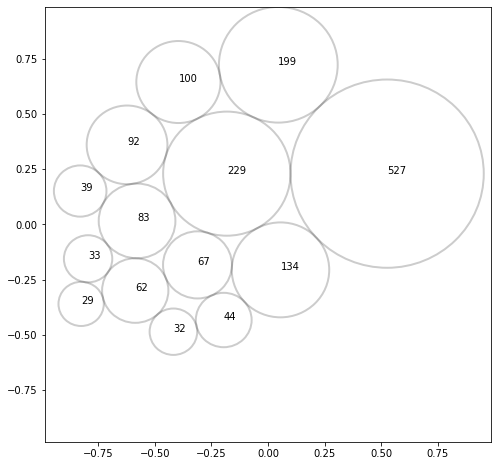

In [104]:
circles2 = circ.circlify([occupations[0], 
                          occupations[1], 
                          occupations[2],
                          occupations[3],
                          occupations[4],
                          occupations[5],
                          occupations[6],
                          occupations[7],
                          occupations[8],
                          occupations[10],
                          occupations[11],
                         occupations[12],
                         occupations[13],
                         occupations[14]],
                         show_enclosure=False)
pp(circles)
circ.bubbles(circles2)